#### Import of Necessary Packages

In [77]:
import numpy as np
import pandas as pd
import os


# import pdb
# x = 3
# y = [x + 4]
# z = [5,6,7,8]
# # pdb.set_trace()
# s = y + z
# s


#### Reading of Dataset

In [78]:
df_original = pd.read_csv('data/train.csv')
# df_original = pd.read_csv('C:/Users/SoumyadiptaMaiti/Data Science/Kaggle/Kaggle Compititions/2022/New York City Taxi Trip Duration/nyc-taxi-trip-duration/data/train.csv')
df = df_original.copy(deep = 'true')
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [79]:
df_test = pd.read_csv('data/test.csv')
df_submission = df_test.copy(deep='true')
df_submission.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


## Data Analysis

### Varibale Types

In [81]:
# Catergorical variables
cat_var = [var for var in df.columns if df[var].dtype=='O']
cat_var.remove('id')# need to skip id variable as it's unique for each row

# Numerical variables
num_var = [var for var in df.columns if df[var].dtype!='O']
num_var.remove('trip_duration')# need to skip target variable trip_duration

print(cat_var , '\n' , num_var)
# num_var


['pickup_datetime', 'dropoff_datetime', 'store_and_fwd_flag'] 
 ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']


In [82]:
# Distrinct variables
# len(pd.unique(df['pickup_longitude']))
df['vendor_id'] = df['vendor_id'].astype('O')
df_test['vendor_id'] = df_test['vendor_id'].astype('O')
num_var.remove('vendor_id')
cat_var.append('vendor_id')

# dis_var = [var for var in num_var if len(pd.unique(df[var]))<20]
# dis_var


In [83]:
df['passenger_count'].unique()

array([1, 6, 4, 2, 3, 5, 0, 7, 9, 8], dtype=int64)

## Data Cleaning

#### Missing Data

In [84]:
# Count of column wise NA/Missing values
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

#### Duplicate Rows

In [85]:
# Count number of duplicated Rows
df.duplicated().sum()

0

There is no Missing Values or duplicated Rows

#### Dsitribution of Variables & Outliers 

In [86]:
df.describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


As trip_duration contains high SD, it might contain outliers.

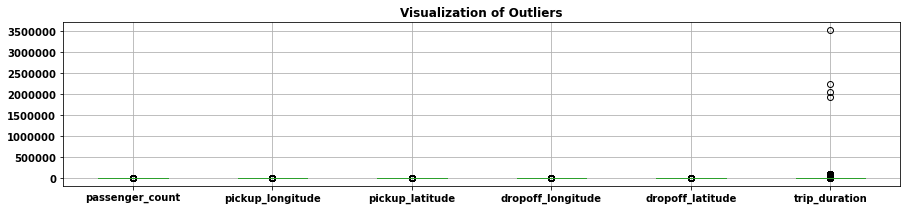

In [87]:
#Visualize univariate outliers via box-lpot

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


plt.subplots(figsize=(15,3))
plt.title("Visualization of Outliers")
plt.ticklabel_format(style='plain')
df.boxplot();

In [88]:
df['trip_duration'].max()

3526282

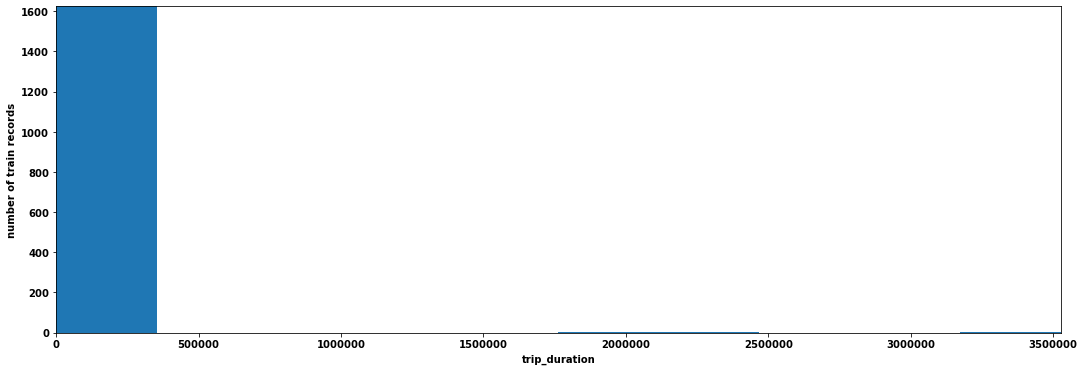

In [89]:
# To Check Distribution of trip_duration

plt.subplots(figsize=(18,6))
plt.hist(df['trip_duration'].values)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
plt.ticklabel_format(style='plain')
plt.xlim(0, df['trip_duration'].max())
plt.ylim(0, df['trip_duration'].value_counts().max())
plt.show()

Function to define boundaries for skewed distribution

In [90]:
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate
# the boundaries.

def find_skewed_boundary(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary


In [91]:
trip_duration_upper_boundary, trip_duration_lower_boundary = find_skewed_boundary(df, 'trip_duration', 1.5)
df = df[(df.trip_duration < trip_duration_upper_boundary) & (df.trip_duration > trip_duration_lower_boundary)]

In [92]:
trip_duration_lower_boundary, trip_duration_upper_boundary

(-620.0, 2092.0)

In [93]:
print('Distinct Values of passenger_count = ' + str(df['passenger_count'].unique()))

Distinct Values of passenger_count = [1 6 4 2 3 5 0 7 9 8]


Trip with zero passenger is meaningless. So removing all rows having zero passenger.

In [94]:
df = df[(df.passenger_count > 0)]

In [95]:
# dis_var, num_var

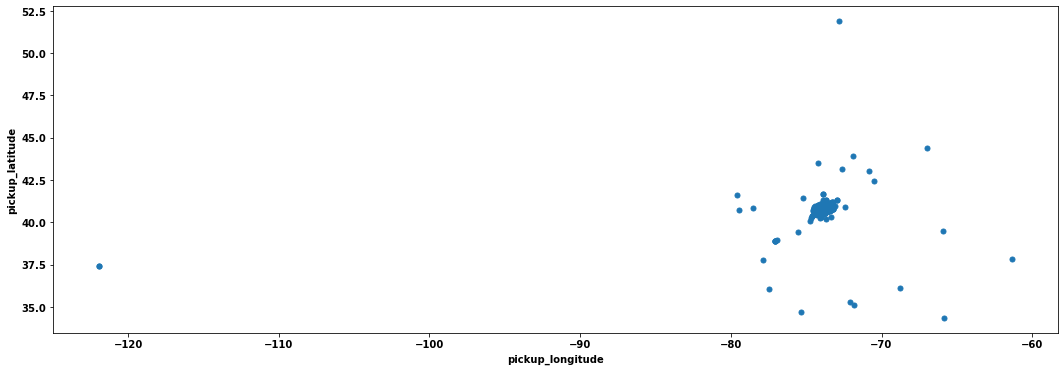

In [96]:
#Plot pickup positions to visualize outliers
pickup_longitude = list(df.pickup_longitude)
pickup_latitude = list(df.pickup_latitude)
plt.subplots(figsize=(18,6))
plt.plot(pickup_longitude, pickup_latitude, '.', alpha = 1, markersize = 10)
plt.xlabel('pickup_longitude')
plt.ylabel('pickup_latitude')
plt.show()

In [97]:
#Remove pickup position outliers
df = df[(df.pickup_longitude > -100)]
df = df[(df.pickup_latitude < 50)]

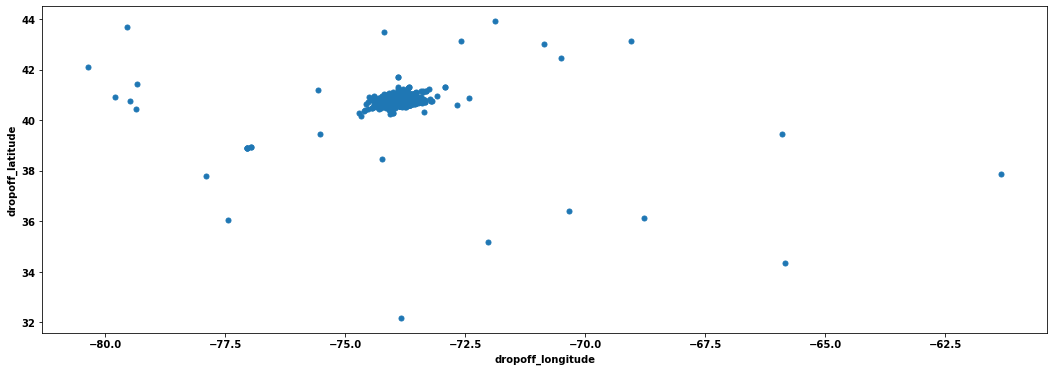

In [98]:
#Plot dropoff positions to visualize outliers
dropoff_longitude = list(df.dropoff_longitude)
dropoff_latitude = list(df.dropoff_latitude)
plt.subplots(figsize=(18,6))
plt.plot(dropoff_longitude, dropoff_latitude, '.', alpha = 1, markersize = 10)
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.show()

In [99]:
# #Remove dropoff position outliers
# df = df[(df.dropoff_longitude > -100)]
# df = df[(df.dropoff_latitude < 50)]

## Feature Engineering

### Variable Transformation

#### Target Variable

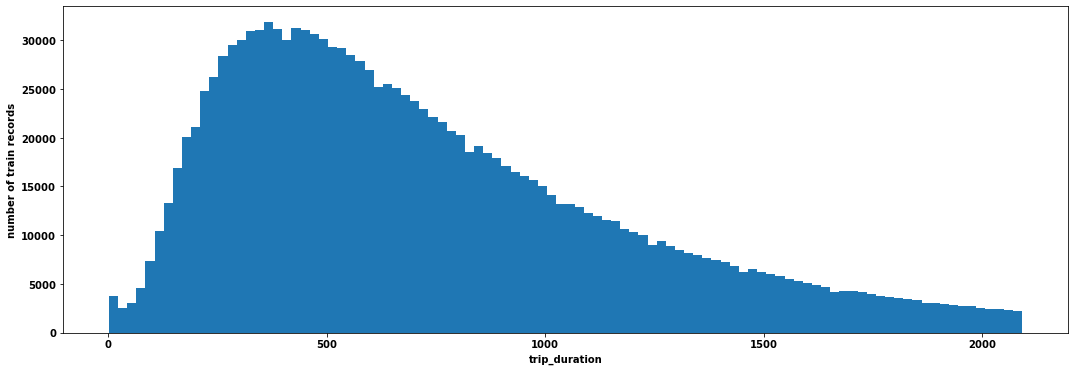

In [100]:
# To Check Distribution of trip_duration

plt.subplots(figsize=(18,6))
plt.hist(df['trip_duration'].values, bins=100)
plt.xlabel('trip_duration')
plt.ylabel('number of train records')
# plt.ticklabel_format(style='plain')
# plt.xlim(0, df['trip_duration'].max())
# plt.ylim(0, df['trip_duration'].value_counts().max())
plt.show()

The distribution is right-skewed so we can consider a log-transformation of trip_duration column.

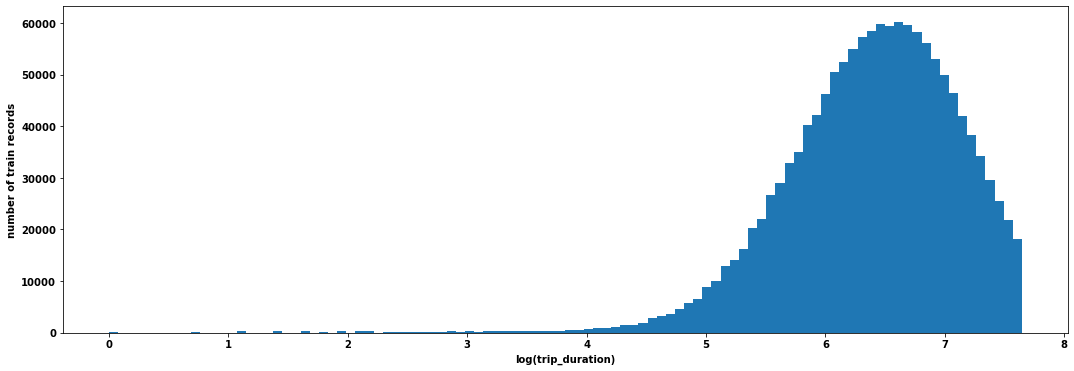

In [101]:
#Log-transformation
plt.subplots(figsize=(18,6))
df['trip_duration'] = np.log(df['trip_duration'].values)
plt.hist(df['trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()

### Plots to assess normality

To visualise the distribution of the variables, we plot a histogram and a Q-Q plot. In the Q-Q pLots, if the variable is normally distributed, the values of the variable should fall in a 45 degree line when plotted against the theoretical quantiles.


In [102]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

import scipy.stats as stats

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    
    plt.xlabel(variable)
    plt.ylabel('No of Occurance')

    plt.show()

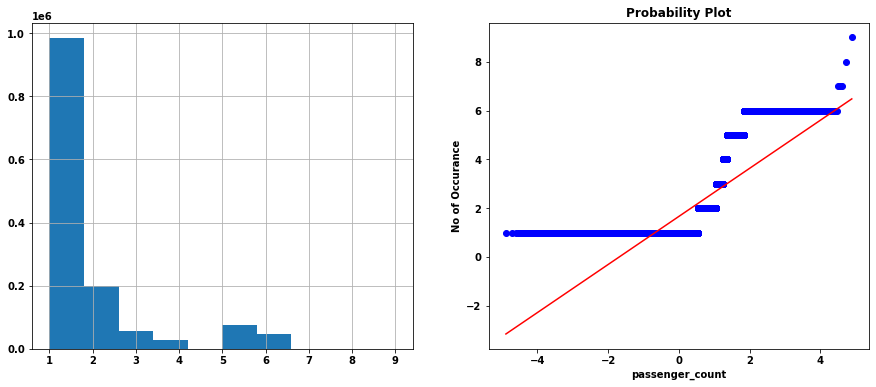

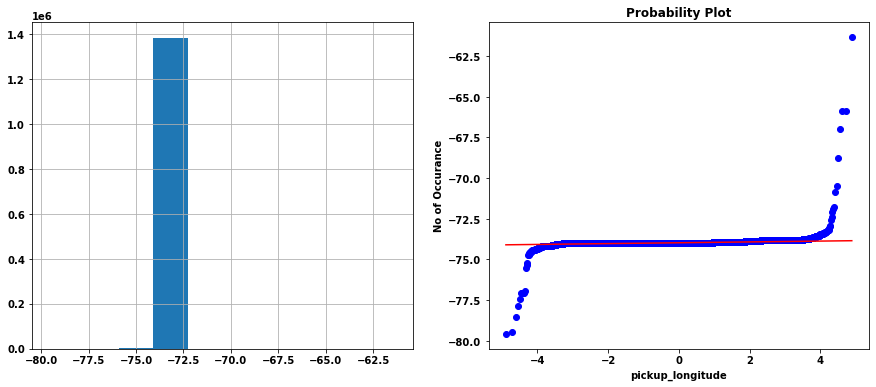

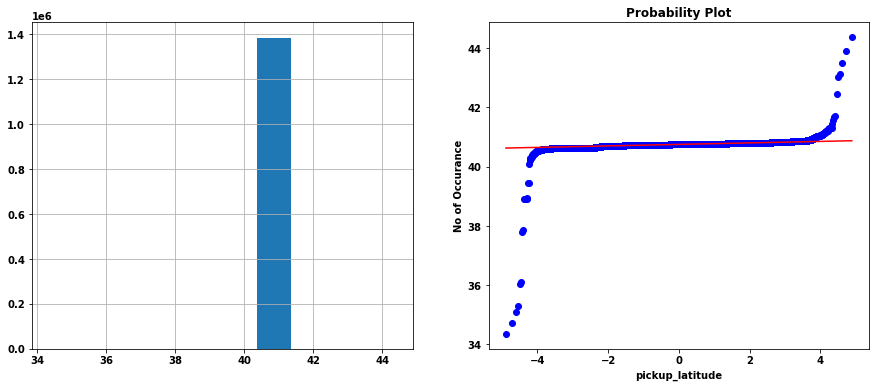

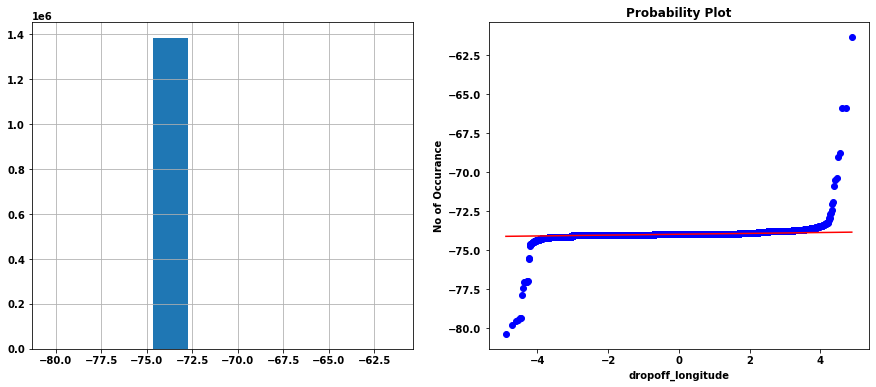

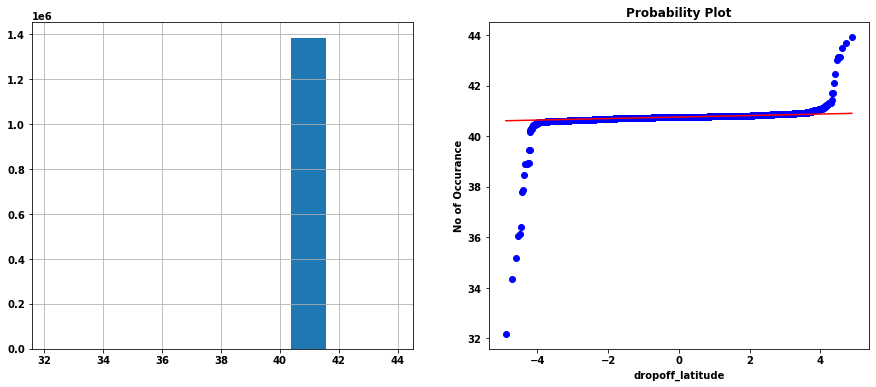

In [103]:
for var in num_var:
    diagnostic_plots(df,var)

In [104]:
# ## Log Transformer

# import feature_engine.transformation as vt
# lt = vt.LogTransformer(variables = ['trip_duration'])
# lt.fit(df)
# df_tf = lt.transform(df)
# diagnostic_plots(df_tf, 'trip_duration')

### Temporal variables

In [105]:
#Datetyping the dates
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df_test['pickup_datetime'] = pd.to_datetime(df_test.pickup_datetime)

df.drop(['dropoff_datetime'], axis=1, inplace=True) #as this feature is not present in test set
cat_var.remove('dropoff_datetime')


#Date features creations and deletions
df['date'] = df.pickup_datetime.dt.date
df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['week'] = df.pickup_datetime.dt.week
df['day_of_week'] = df.pickup_datetime.dt.day_of_week
# df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour
df['minute'] = df.pickup_datetime.dt.minute
df['minute_oftheday'] = df['hour'] * 60 + df['minute']
df.drop(['minute'], axis=1, inplace=True)
df.drop(['hour'], axis=1, inplace=True)
df.drop(['pickup_datetime'], axis=1, inplace=True)

df_test['date'] = df_test.pickup_datetime.dt.date
df_test['year'] = df_test.pickup_datetime.dt.year
df_test['month'] = df_test.pickup_datetime.dt.month
df_test['week'] = df_test.pickup_datetime.dt.week
df_test['day_of_week'] = df_test.pickup_datetime.dt.day_of_week
# df_test['weekday'] = df_test.pickup_datetime.dt.weekday
df_test['hour'] = df_test.pickup_datetime.dt.hour
df_test['minute'] = df_test.pickup_datetime.dt.minute
df_test['minute_oftheday'] = df_test['hour'] * 60 + df_test['minute']
df_test.drop(['minute'], axis=1, inplace=True)
df_test.drop(['hour'], axis=1, inplace=True)
df_test.drop(['pickup_datetime'], axis=1, inplace=True)

# num_var.append('date')
num_var.append('year')
num_var.append('month')
num_var.append('week')
num_var.append('day_of_week')
num_var.append('minute_oftheday')
cat_var.remove('pickup_datetime')


df.info()



C:\Users\SOUMYA~1\AppData\Local\Temp/ipykernel_5044/3449109456.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df.pickup_datetime.dt.week
C:\Users\SOUMYA~1\AppData\Local\Temp/ipykernel_5044/3449109456.py:26: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_test['week'] = df_test.pickup_datetime.dt.week


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384261 entries, 0 to 1458643
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1384261 non-null  object 
 1   vendor_id           1384261 non-null  object 
 2   passenger_count     1384261 non-null  int64  
 3   pickup_longitude    1384261 non-null  float64
 4   pickup_latitude     1384261 non-null  float64
 5   dropoff_longitude   1384261 non-null  float64
 6   dropoff_latitude    1384261 non-null  float64
 7   store_and_fwd_flag  1384261 non-null  object 
 8   trip_duration       1384261 non-null  float64
 9   date                1384261 non-null  object 
 10  year                1384261 non-null  int64  
 11  month               1384261 non-null  int64  
 12  week                1384261 non-null  int64  
 13  day_of_week         1384261 non-null  int64  
 14  minute_oftheday     1384261 non-null  int64  
dtypes: float64(5), 

In [106]:
df['year'].unique()
df_test['year'].unique()

array([2016], dtype=int64)

In [107]:
import holidays
import datetime

# year = df['date'].str.slice(0,4)
# year_unq = year.unique()

holidays_us = []

for date in holidays.UnitedStates(years=[2016]).items():  ## ?? need to change for dynamic year selection
        holidays_us.append(str(date[0]))
    

df['us_holiday'] = [
    1 if val in holidays_us else 0 for val in df['date']]

df['us_holiday'] = df['us_holiday'].astype('O')
df.drop(['date'], axis=1, inplace=True)

    
# dis_var.append('us_holiday')

df_test['us_holiday'] = [
    1 if val in holidays_us else 0 for val in df_test['date']]

df_test['us_holiday'] = df_test['us_holiday'].astype('O')
df_test.drop(['date'], axis=1, inplace=True)

cat_var.append('us_holiday')
    

### Deriving Distance variable

In [108]:
import math
def Distance(lat1, lng1, lat2, lng2):
    
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    R = 6373.0 # AVG_EARTH_RADIUS in KM
    dlng = lng2 - lng1
    dlat = lat2 - lat1
    a = (np.sin(dlat/2))**2 + np.cos(lat1) * np.cos(lat2) * (np.sin(dlng/2))**2
    distance = 2 * R * np.arcsin(np.sqrt(a))
    return distance

In [109]:
df['distance']=Distance(df['pickup_latitude'].values,
                        df['pickup_longitude'].values, 
                        df['dropoff_latitude'].values,
                        df['dropoff_longitude'].values)

In [110]:
df_test['distance']=Distance(df_test['pickup_latitude'].values,
                        df_test['pickup_longitude'].values, 
                        df_test['dropoff_latitude'].values,
                        df_test['dropoff_longitude'].values)

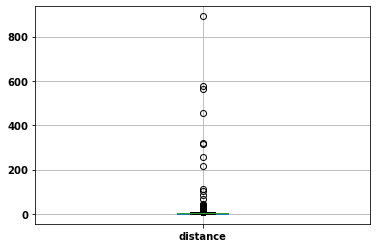

In [111]:
#Plot distance feature to visualize outliers
df.boxplot(column='distance', return_type='axes');

In [112]:
#Remove distance outliers
df = df[(df.distance < 200)]

### Create speed feature

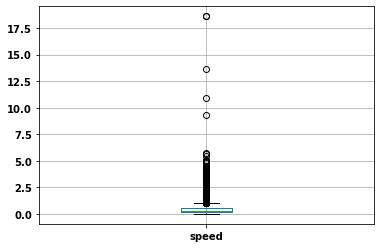

In [113]:
df['speed'] = df.distance / df.trip_duration

#Plot speed feature to visualize outliers
df.boxplot(column='speed', return_type='axes');

In [114]:
#Remove speed outliers & then this feature
df = df[(df.speed < 30)]
df.drop(['speed'], axis=1, inplace=True)

#### Cor-relation among all variables

In [115]:
pd.unique(df['year'])

array([2016], dtype=int64)

Text(0.5, 1.0, 'Correlations between variables')

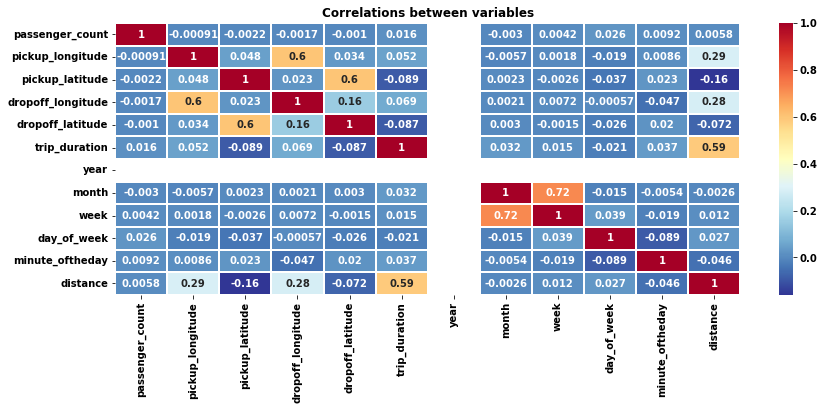

In [116]:
import seaborn as sns

# features = num_var+dis_var+cat_var+['trip_duration']
# # we calculate the correlations using pandas corr & round the values to 2 decimals
# correlation_matrix = df[features].corr().round(2)

# figure = plt.figure(figsize=(8, 8))
# sns.heatmap(data=correlation_matrix, annot=True)
fig, ax = plt.subplots(figsize=(14,5))
sns.heatmap(data=df.corr(), annot=True, cmap = plt.cm.RdYlBu_r, linewidths=.1, ax=ax).set_title('Correlations between variables')

In [117]:
df.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'year', 'month', 'week',
       'day_of_week', 'minute_oftheday', 'us_holiday', 'distance'],
      dtype='object')

#### Split of Labelled data into Train & Test Set

In [118]:
from sklearn.model_selection import train_test_split

X = df
y = X["trip_duration"]
X.drop(["trip_duration"], axis=1, inplace=True)
X.drop(['id'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1107376, 14), (1107376,), (276845, 14), (276845,))

In [119]:
cat_var

['store_and_fwd_flag', 'vendor_id', 'us_holiday']

In [120]:
# help(StandardScaler())

In [121]:
# for the model
# from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
import lightgbm as lgb
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# for feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce


trip_pipeline = Pipeline([

#     # missing data imputation
#     ('missing_ind', mdi.AddMissingIndicator(
#         variables=['country', 'store',  'product'])),
    
#     ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
#                                           variables=['country', 'store',  'product'])),
    
#     ('imputer_cat', mdi.CategoricalImputer(variables=cat_var)),

#     # categorical encoding
#     ('rare_label_enc', ce.RareLabelEncoder(
#         tol=0.05, n_categories=6, variables=cat_var+dis_var)),
        
    
#     ('categorical_enc', ce.OrdinalEncoder(
#         encoding_method='ordered', variables=cat_var+dis_var)),
    
    ('categorical_enc', ce.OneHotEncoder(variables=cat_var)),

#     # discretisation + encoding
#     ('discretisation', dsc.EqualFrequencyDiscretiser(
#         q=5, return_object=True, variables=num_var)),
    
#     ('encoding', ce.OrdinalEncoder(
#         encoding_method='ordered', variables=num_var)),

    # feature Scaling 
    ('scaler', StandardScaler()),
    
# Model Selection    
#     # Lasso Regression
#     ('lasso', Lasso(random_state=0))
    
#     # Linear Regression
#     ('Linear Regression', LinearRegression())
    
#         # Ridge Regression
#     ('ridge', Ridge(random_state=0))
    
#    Random Forest
    ('model', RandomForestRegressor(random_state=0))
# #     GradientBoosting
#     ('gradient_boosting', GradientBoostingRegressor(random_state=0))
# #     LightGBM
#     ('light_GBM', lgb(random_state=0))
])

In [122]:
# RandomForestRegressor()

In [123]:
from sklearn.model_selection import GridSearchCV

trip_parameters = [
    {
        'model': (RandomForestRegressor(),),
        'model__n_estimators': (10, 30)
    }, {
        'model': (GradientBoostingRegressor(),),
        'model__n_estimators': (10, 30)
    },
#     {
#         'model': (lgb(),),
#         'model__metric': ('rmse')
#         'model__is_training_metric': (True)
#     },
]

# now we set up the grid search with cross-validation
grid_search = GridSearchCV(trip_pipeline, trip_parameters,
                          cv=5, n_jobs=-1, scoring='roc_auc')

In [124]:
# X_train.columns
# y_train.describe
cat_var

['store_and_fwd_flag', 'vendor_id', 'us_holiday']

In [125]:
# now we train over all the possible combinations of the parameters above
grid_search.fit(X_train, y_train)

C:\Users\SoumyadiptaMaiti\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('categorical_enc',
                                        OneHotEncoder(variables=['store_and_fwd_flag',
                                                                 'vendor_id',
                                                                 'us_holiday'])),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=0))]),
             n_jobs=-1,
             param_grid=[{'model': (RandomForestRegressor(n_estimators=10),),
                          'model__n_estimators': (10, 30)},
                         {'model': (GradientBoostingRegressor(),),
                          'model__n_estimators': (10, 30)}],
             scoring='roc_auc')

In [126]:
# # and we print the best score over the train set
# print(("best roc-auc from grid search: %.3f"
#        % grid_search.score(X_train, y_train)))

In [127]:
# we can print the best estimator parameters like this
grid_search.best_estimator_

Pipeline(steps=[('categorical_enc',
                 OneHotEncoder(variables=['store_and_fwd_flag', 'vendor_id',
                                          'us_holiday'])),
                ('scaler', StandardScaler()),
                ('model', RandomForestRegressor(n_estimators=10))])

In [128]:
# and find the best fit parameters like this
grid_search.best_params_

{'model': RandomForestRegressor(n_estimators=10), 'model__n_estimators': 10}

In [129]:
# and finally let's check the performance over the test set
print(("best linear regression from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

ValueError: continuous format is not supported

### Final prediction

In [130]:
X_train.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'year',
       'month', 'week', 'day_of_week', 'minute_oftheday', 'us_holiday',
       'distance'],
      dtype='object')

In [131]:
df_submission.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

In [132]:
df_test.columns

Index(['id', 'vendor_id', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'year', 'month', 'week', 'day_of_week',
       'minute_oftheday', 'us_holiday', 'distance'],
      dtype='object')

In [134]:
df_test.drop(['id'], axis=1, inplace=True)

KeyError: "['id'] not found in axis"

In [137]:
df_test.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'year',
       'month', 'week', 'day_of_week', 'minute_oftheday', 'us_holiday',
       'distance'],
      dtype='object')

In [138]:
df_submit_preds = grid_search.predict(df_test)
# df_submit_preds = goods_pipe.predict(df_submit)
df_submit_preds

array([6.59647372, 6.36196395, 5.92420857, ..., 7.18635487, 7.41249892,
       7.02898349])

In [74]:
df_submission.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'year',
       'month', 'week', 'day_of_week', 'minute_oftheday', 'us_holiday',
       'distance'],
      dtype='object')

In [144]:
y_train.head(5)

1351079    5.811141
1202709    5.996452
1218765    5.389072
453675     6.883463
992254     7.595387
Name: trip_duration, dtype: float64

In [154]:
# df_submit_preds_final = pd. DataFrame (df_submit_preds)
df_submit_preds_final = pd.DataFrame(np.exp(df_submit_preds))
df_submit_preds_final = df_submit_preds_final.round(0).astype(int)
# df_submit_preds_1['row_id'] = df_submission['row_id']
df_submit_preds_final.insert(0,'id',df_submission['id'])
df_submit_preds_final.columns = ['id','trip_duration']
df_submit_preds_final

,id,trip_duration
0,id3004672,733
1,id3505355,579
2,id1217141,374
3,id2150126,1091
4,id1598245,380
...,...,...
625129,id3008929,275
625130,id3700764,1183
625131,id2568735,1321
625132,id1384355,1657


In [155]:
df_submit_preds_final.to_csv(r'data/final_submission.csv',index = False)